## Question 1

1. Given the data table `wage_data` below,

In [2]:
import pandas as pd

wage_data = pd.DataFrame({'wage': [3.10, 3.24, 3.00, 6.00, 5.30],
                          'educ': [11.0, 12.0, 11.0, 8.0, 12.0],
                          'expr': [2.0, 22.0, 2.0, 44.0, 7.0],
                          'female': [1.0, 1.0, 0.0, 0.0, 0.0],
                          'married': [0.0, 1.0, 0.0, 0.0, 1.0]})
wage_data

,wage,educ,expr,female,married
0,3.10,11.0,2.0,1.0,0.0
1,3.24,12.0,22.0,1.0,1.0
2,3.00,11.0,2.0,0.0,0.0
3,6.00,8.0,44.0,0.0,0.0
4,5.30,12.0,7.0,0.0,1.0


which of the following code gives the median of variable `wage`?

    A. 
---
```python
wage_summary = wage_data.describe()
print(wage_summary.loc['wage', 'median']) 
```
---

    B. 
---
```python
wage_summary = wage_data.describe()
print(wage_summary.loc['median', 'wage'])
```
---

    C. 
---
```python
wage_summary = wage_data.describe()
print((wage_summary.loc['wage', 'min']+wage_summary.loc['wage', 'max'])/2)
```
---

    D. 
---
```python
wage_summary = wage_data.describe()
print((wage_summary.loc['50%', 'wage']))
```
---

<br>

2. For the same dataset `wage_data`, which of the following code segments is correct in printing the correlation between `educ` and `expr`.

    A. 
---
```python
corr_table = wage_data.corr()
print(corr_table.iloc['educ', 'expr']) 
```
---

    B. 
---
```python
corr_table = wage_data.corr()
print(corr_table.iloc[1, 2]) 
```
---

    C. 
---
```python
corr_table = wage_data.corr()
print(corr_table.loc[:, 'educ'].loc[:, 'expr'])
```
---

    D. 
---
```python
corr_table = wage_data.corr()
print(corr_table.loc[:, 'educ':'expr'])
```
---

In [8]:
# ANS: D
wage_summary = wage_data.describe()
display(wage_summary)
wage_summary.loc['50%', 'wage']

,wage,educ,expr,female,married
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,4.128000,10.800000,15.400000,0.400000,0.400000
std,1.413832,1.643168,17.966636,0.547723,0.547723
min,3.000000,8.000000,2.000000,0.000000,0.000000
25%,3.100000,11.000000,2.000000,0.000000,0.000000
50%,3.240000,11.000000,7.000000,0.000000,0.000000
75%,5.300000,12.000000,22.000000,1.000000,1.000000
max,6.000000,12.000000,44.000000,1.000000,1.000000


3.24

In [11]:
# ANS: B
corr_table = wage_data.corr()
display(corr_table)
print(corr_table.iloc[1, 2]) 

,wage,educ,expr,female,married
wage,1.000000,-0.573787,0.656686,-0.618553,0.091685
educ,-0.573787,1.000000,-0.741815,0.388889,0.666667
expr,0.656686,-0.741815,1.000000,-0.172751,-0.045728
female,-0.618553,0.388889,-0.172751,1.000000,0.166667
married,0.091685,0.666667,-0.045728,0.166667,1.000000


-0.7418147590337925


## Question 2
Considering the following dataset on Singapore private house properties.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

prop = pd.read_csv('properties.csv')
prop.head()

,project,street,type,district,segment,tenure,commence,sale,total_price,area,level,unit_price,date
0,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,99 years,2019.0,New Sale,2567000,1496,11 to 15,1716,Dec-2021
1,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,2986000,1281,16 to 20,2331,Dec-2021
2,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,1835000,700,21 to 25,2623,Dec-2021
3,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,1924000,840,06 to 10,2292,Dec-2021
4,THE CREST,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 years,2012.0,Resale,1620000,883,11 to 15,1835,Dec-2021


Details of the variables are given below:
- `project`: The name of the property project.
- `street`: The street name of the property.
- `type`: The type of the property: apartment or condominium.
- `district`: Location of the property, given as the district code of Singapore, details can be found [here](https://www.mingproperty.sg/singapore-district-code/).
- `segment`: Location of the property, given as the region segment of Singapore: Core Central Region (CCR), Rest of Central Region (RCR), or the Outside Central Region (OCR).
- `tenure`: The tenure type of the property: 99 years or freehold.
- `commence`: The commencing year of the property.
- `sale`: The sales type of the property: new sale or resale.
- `total_price`: The total price (in Singapore Dollars) of the property.
- `area`: The area of the property in square feet.
- `level`: The levels of the condos.
- `unit_price`: The per square feet price of the property (in Singapore Dollars).
- `date`: The date of the transaction. 

1. What is the average unit price of all **new sale freehold condos smaller than 2000 square feet**?

In [24]:
is_new_sale = prop['sale'] == 'New Sale'
is_freehold = prop['tenure'] == 'freehold'
is_smaller_2000 = prop['area'] < 2000
is_condo = prop['type'] == 'Condominium'
subset = prop[is_new_sale & is_freehold & is_smaller_2000 & is_condo]
display(subset)
subset['unit_price'].mean()

,project,street,type,district,segment,tenure,commence,sale,total_price,area,level,unit_price,date
20631,VILLAGE @ PASIR PANJANG,PASIR PANJANG ROAD,Condominium,5,RCR,freehold,NaN,New Sale,1700000,1410,01 to 05,1206,Feb-2017
20806,LEEDON GREEN,LEEDON HEIGHTS,Condominium,10,CCR,freehold,NaN,New Sale,2017000,710,11 to 15,2839,Dec-2021
20808,LEEDON GREEN,LEEDON HEIGHTS,Condominium,10,CCR,freehold,NaN,New Sale,1839000,700,01 to 05,2628,Dec-2021
20809,LEEDON GREEN,LEEDON HEIGHTS,Condominium,10,CCR,freehold,NaN,New Sale,1424000,538,01 to 05,2646,Dec-2021
20822,ROYALGREEN,ANAMALAI AVENUE,Condominium,10,CCR,freehold,NaN,New Sale,3701200,1259,01 to 05,2939,Dec-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100390,THE CREEK @ BUKIT,TOH TUCK ROAD,Condominium,21,RCR,freehold,NaN,New Sale,1645000,1206,01 to 05,1365,Feb-2017
100394,THE CREEK @ BUKIT,TOH TUCK ROAD,Condominium,21,RCR,freehold,NaN,New Sale,1610129,936,01 to 05,1719,Feb-2017
100406,THE CREEK @ BUKIT,TOH TUCK ROAD,Condominium,21,RCR,freehold,NaN,New Sale,1500000,969,01 to 05,1548,Feb-2017
100446,THE CREEK @ BUKIT,TOH TUCK ROAD,Condominium,21,RCR,freehold,NaN,New Sale,1246000,753,01 to 05,1654,Jan-2017


2290.2696443341606

2. Considering all **new sale freehold condos smaller than 2000 square feet**, use proper data visualization method to show how prices of condos in different regions, CCR, RCR, or OCR, are affected by their areas.

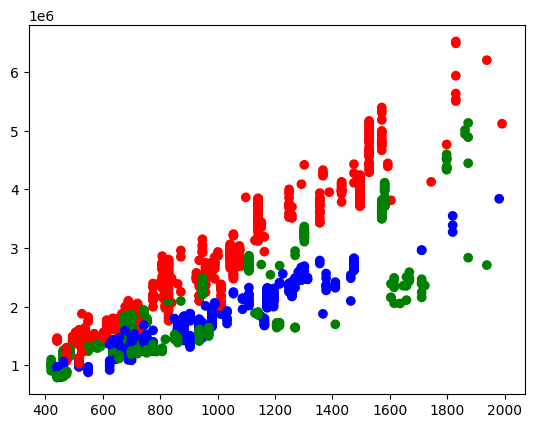

In [36]:
# Show scatter plot of prices of condos in different regions (e.g. CCR, RCR, OCR) with respect to their areas
colors = {'CCR':'red', 'RCR':'green', 'OCR':'blue'}

plt.scatter(subset['area'], subset['total_price'], c=subset['segment'].map(colors))

## Question 2

The prices of fifteen stocks between September 2021 and August 2021 are included in the data file 'stocks.csv'. 

In [42]:
stocks = pd.read_csv('stocks.csv')
stocks

,JPM,XOM,CRM,AMZN,TSLA,TWTR,AAPL,ORCL,GOOG,ZM,MCD,NKE,SBUX,T,KO
0,155.282562,51.443314,268.320007,173.949997,244.696671,65.550003,151.660172,88.562317,145.841995,290.859985,232.953491,163.017487,114.887390,18.961119,54.612629
1,156.002014,52.696636,264.149994,173.156006,244.130005,64.599998,152.793808,88.414650,144.218994,295.089996,234.635956,162.135849,114.809143,19.274929,54.689697
2,155.058945,52.495712,267.079987,173.902496,244.523331,64.660004,153.440186,88.611557,144.774994,298.290009,233.608871,161.759384,114.633080,19.219139,54.651161
3,154.786728,52.189560,265.209991,175.464493,250.973328,64.980003,155.816879,87.351303,145.518997,299.959991,231.036270,161.115479,113.263618,19.121511,53.630005
4,154.096451,51.711193,262.619995,176.274994,251.289993,62.270000,154.245682,88.089737,144.883499,293.600006,233.413239,159.203583,115.464531,19.247034,54.352516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,118.550003,99.089996,173.910004,137.279999,296.070007,41.049999,170.029999,76.889999,117.699997,85.720001,261.130615,112.895729,87.389999,18.090000,64.201912
248,114.669998,97.870003,165.229996,130.750000,288.089996,40.459999,163.619995,74.650002,111.300003,81.410004,255.551178,107.969872,84.059998,17.889999,62.653210
249,114.389999,100.120003,160.210007,129.789993,284.820007,40.040001,161.380005,74.190002,110.339996,81.000000,254.268188,107.571014,84.120003,17.780001,62.275959
250,114.410004,96.309998,159.669998,128.729996,277.700012,39.320000,158.910004,74.139999,109.910004,81.419998,252.110016,107.551079,83.410004,17.820000,61.700157


1. Visualize the price trend of ONE select stock. 

**Solution**:

In [43]:
stocks['Day'] = stocks.index + 1
stocks.head()

,JPM,XOM,CRM,AMZN,TSLA,TWTR,AAPL,ORCL,GOOG,ZM,MCD,NKE,SBUX,T,KO,Day
0,155.282562,51.443314,268.320007,173.949997,244.696671,65.550003,151.660172,88.562317,145.841995,290.859985,232.953491,163.017487,114.887390,18.961119,54.612629,1
1,156.002014,52.696636,264.149994,173.156006,244.130005,64.599998,152.793808,88.414650,144.218994,295.089996,234.635956,162.135849,114.809143,19.274929,54.689697,2
2,155.058945,52.495712,267.079987,173.902496,244.523331,64.660004,153.440186,88.611557,144.774994,298.290009,233.608871,161.759384,114.633080,19.219139,54.651161,3
3,154.786728,52.189560,265.209991,175.464493,250.973328,64.980003,155.816879,87.351303,145.518997,299.959991,231.036270,161.115479,113.263618,19.121511,53.630005,4
4,154.096451,51.711193,262.619995,176.274994,251.289993,62.270000,154.245682,88.089737,144.883499,293.600006,233.413239,159.203583,115.464531,19.247034,54.352516,5


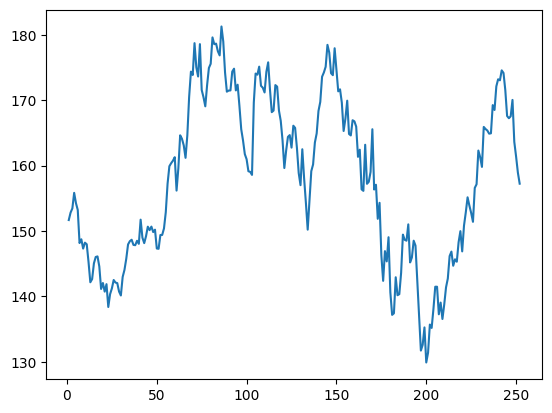

In [45]:
# Visualize the price trend of AAPL
plt.plot(stocks['Day'], stocks['AAPL'])

2. Calculate the daily return rate in percentage of each stock, and visualize the trend of the return rate of ONE stock.

*Hint*: you could use the `stocks.pct_change()` method to calculate the rate of change between rows.

**Solution**:

3. What are the average values and variances of the daily return rates of these stocks?

**Solution**:

4. Visualize the risk-return trade-off, where the x-data are the standard deviations of return rates, and the y-data indicate the average return rates.

**Solution**:

5. Calculate the correlations between these stock prices. 

**Solution**:

6. Visualize the histogram of the return rate of ONE selected stock. 

**Solution**:

7. Moving average is a commonly used tool in analyzing stock markets. Pandas also provides a method called `rolling()` for calculating the moving average of a number of rows. For example, `stock.rolling(5).mean()` calculates the 5-day moving averages of the given stocks. Visualize the trend of the $k$-day moving average of ONE selected stock. You could explore how the trend is affected by different values of $k$. 

**Solution**: